In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv(r"C:\Users\TIBU\Downloads\CodvedaProject\2) Stock Prices Data Set.csv")
df #Display dataframe

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


In [11]:
df = df.dropna(subset=['open', 'close'])

In [12]:
X = df[['open']]   
y = df['close'] 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 0.026677540332499916
Coefficient: 0.9998744981397063


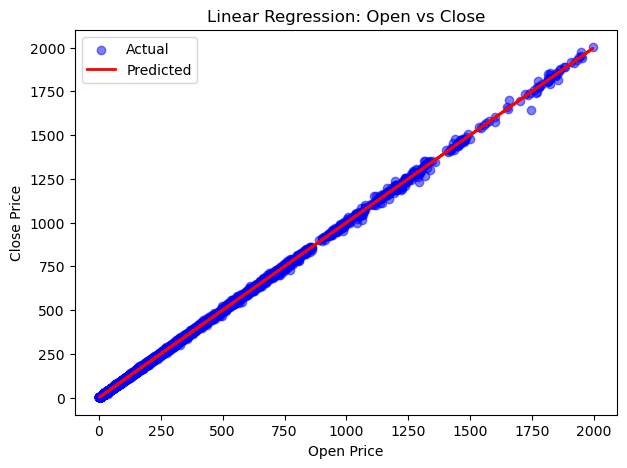

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Linear Regression: Open vs Close")
plt.legend()
plt.show()

In [21]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\TIBU\AppData\Local\Temp\ipykernel_17652\3532345252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [23]:
df = df.sort_values('date')

In [24]:
apple = df[df['symbol'] == 'AAPL']


In [25]:
apple.set_index('date', inplace=True)

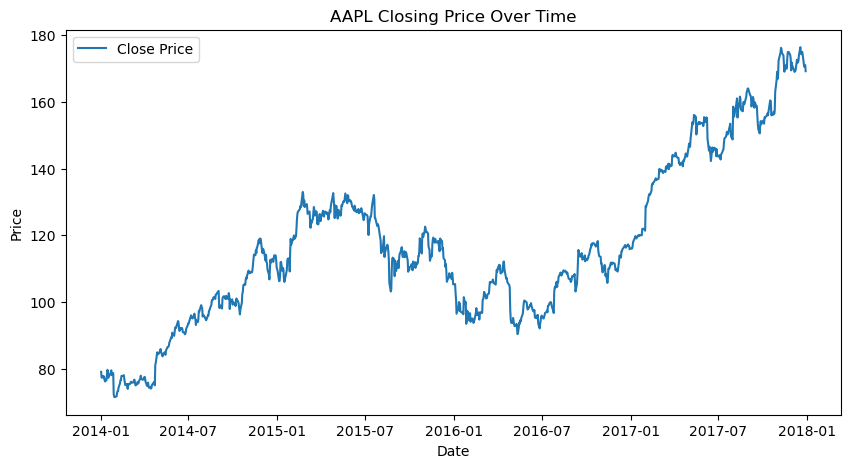

In [26]:
plt.figure(figsize=(10,5))
plt.plot(apple['close'], label="Close Price")
plt.title("AAPL Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

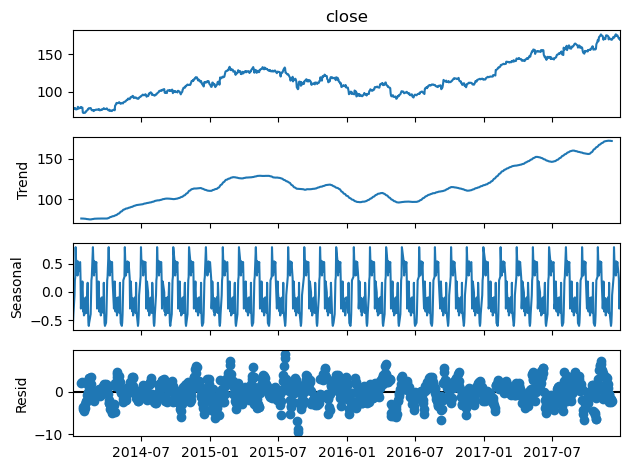

In [27]:
decomposition = seasonal_decompose(apple['close'], model='additive', period=30)  # period ~ 30 days
decomposition.plot()
plt.show()

In [28]:
apple['MA30'] = apple['close'].rolling(window=30).mean()

C:\Users\TIBU\AppData\Local\Temp\ipykernel_17652\2310112797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['MA30'] = apple['close'].rolling(window=30).mean()


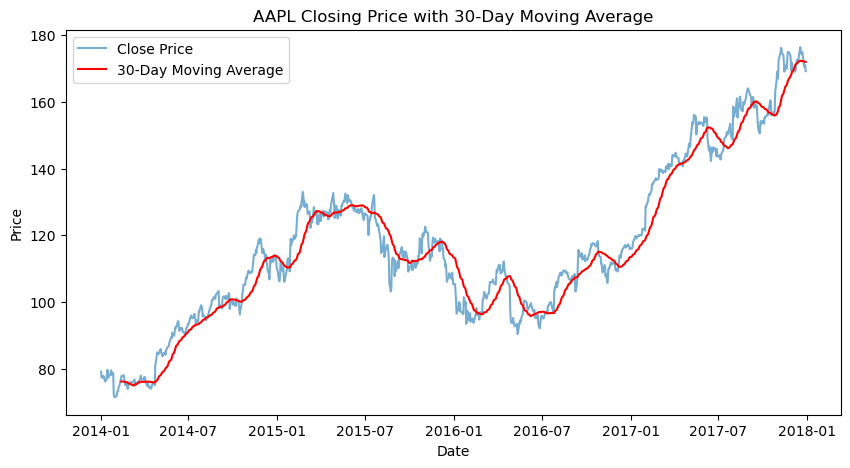

In [29]:
plt.figure(figsize=(10,5))
plt.plot(apple['close'], label="Close Price", alpha=0.6)
plt.plot(apple['MA30'], label="30-Day Moving Average", color="red")
plt.title("AAPL Closing Price with 30-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [31]:
features = df[['open', 'high', 'low', 'close', 'volume']]

In [32]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [33]:
wcss = []  
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

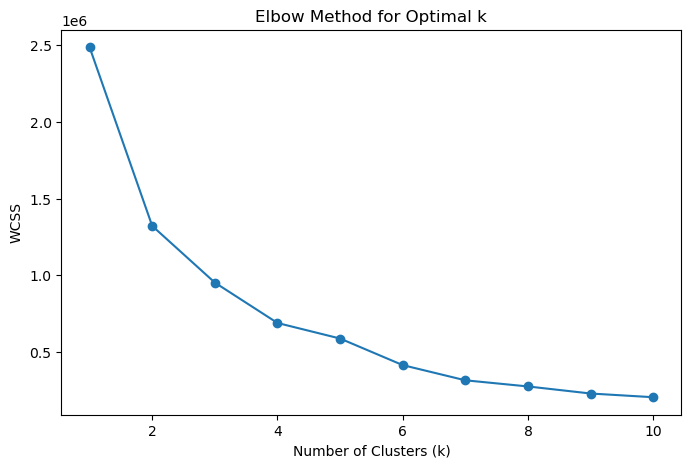

In [34]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)


C:\Users\TIBU\anaconda3\python code\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


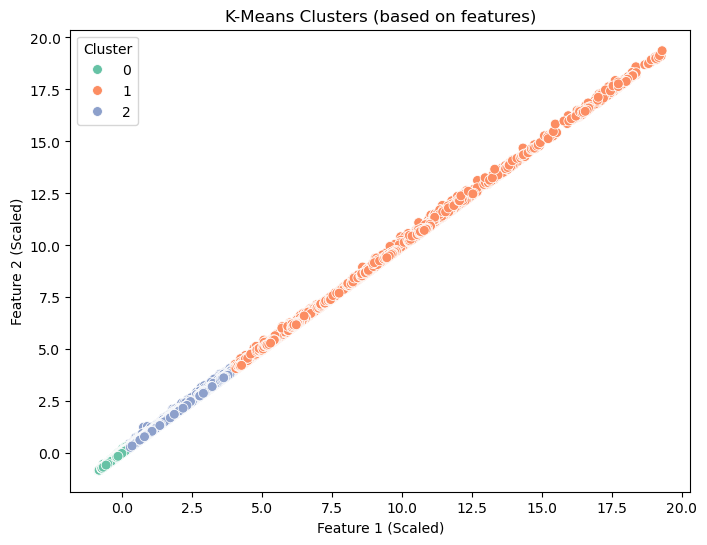

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=df['cluster'], palette="Set2", s=50)
plt.title("K-Means Clusters (based on features)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend(title="Cluster")
plt.show()